# Problema de Negócio

**All in One** é uma empresa fictícia de comércio eletrônico com sede no Reino Unido. Ela oferece uma ampla gama de produtos voltados para diversas categorias, incluindo decoração de casa, suprimentos para festas, acessórios de cozinha, soluções de armazenamento e muito mais.

Após vender com sucesso uma ampla variedade de produtos e acumular uma base substancial de clientes, a All in One reconhece o imenso valor oculto em seus dados de clientes. A empresa tem como objetivo aproveitar o poder da ciência de dados para obter **insights mais profundos** sobre sua base de clientes e aplicar esses insights de forma estratégica. Um de seus principais objetivos é **segmentar seus clientes** de forma eficaz. Essa segmentação permitirá à All in One compreender sua base de clientes em um nível mais detalhado, identificar grupos de clientes específicos com necessidades e preferências distintas, e adaptar seus esforços de marketing e ofertas de produtos de acordo.

Além disso, ao implementar um **programa de fidelidade**, a All in One busca cultivar relacionamentos mais fortes com os clientes e aumentar a retenção deles. Por meio da análise cuidadosa dos comportamentos dos clientes, padrões de compra e preferências, eles podem projetar um programa de fidelidade que ofereça incentivos personalizados, recompensas e benefícios exclusivos para diferentes segmentos de clientes. Essa abordagem personalizada não apenas promove a fidelidade do cliente, mas também cria um senso de apreço e pertencimento entre os clientes, fortalecendo ainda mais sua conexão com a marca.

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"** 

# Dados

Conjunto de dados com as vendas de produtos durante 1 ano (Nov 2015 to Dec 2017)

- **InvoiceNo**: Número da fatura, um identificador único para cada transação
- **StockCode**: Código do produto, um identificador único para cada produto
- **Description**: Descrição do produto
- **Quantity**: Quantidade de produtos comprados em cada transação
- **InvoiceDate**: Data e hora de cada transação
- **UnitPrice**: Preço unitário de cada produto
- **CustomerID**: ID do cliente, um identificador único para cada cliente
- **Country**: País do cliente

# Planejamento da Solução

## Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para participar de um Programa de Fidelidade.
2. Conjunto de Dados:
    - Dados de vendas de uma plataforma de comércio eletrônico online, cobrindo um período de um ano.



## Saída

1. Identificação das pessoas a serem parte do programa Insiders
    - Lista:

    - client_id is_insiders
    - 10323 sim/1
    - 32413 não/0
2. Relatório com respostas para perguntas de negócios:
    - Quem são as pessoas elegíveis para participar do programa Insiders?
    - Quantos clientes serão incluídos no grupo?
    - Quais são as características-chave desses clientes?
    - Qual é a porcentagem de contribuição de receita dos Insiders?
    - Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Quais as condições para uma pessoas ser elegível ao Insiders?
    - Quais as condições para uma pessoas ser removida do Insiders?
    - Qual a garantia que o programa de Insiders é melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tarefa

1. Quem são as pessoas elegíveis para participar do programa Insiders?
    - O que significa ser elegível? Quem são os clientes de alto valor?
    - Receita:
        - Ticket médio alto.
        - Alto valor vitalício do cliente (LTV).
        - Baixa recência.
        - Tamanho do cesto alto.
        - Baixa probabilidade de churn - modelos.
        - Alta previsão de LTV - modelos.
        - Alta propensão de compra - modelos.
    - Custo:
        - Baixa taxa de devolução.
    - Experiência:
        - Media alta de avaliações.

2. Quantos clientes serão incluídos no grupo? 
    - Número total de clientes 
    - % do grupo Insiders

3. Quais são as características-chave desses clientes? 
    - Escrever características dos clientes: 
        - Idade 
        - País 
        - Salário
     - Escrever características de consumo: 
         - Vide acima.

4. Qual é a porcentagem de contribuição de receita dos Insiders? 
    - Receita total do ano 
    - Receita total do grupo Insiders(%) durante o ano.
 
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Cálculo de LTV do grupo Insiders.
    - Séries Temporais(ARMA, ARIMA, HoltWinter, etc)

6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Qual o período de avaliação?
    - O 'desempenho' do cliente está próximo da média do cluster Insiders.

7. Quais as condições para um pessoas ser removida do Insiders?
    - O 'desempenho' do cliente não está mais próximo da média do cluster Insiders.
    
8. Qual a Garantia que o programa Insiders é melhor que o restante da base?
    - Teste de Hipóteses
    - Teste A/B

9. Quais as ações do time de Marketing pode realizar para aumentar o faturamento?
    - Descontos
    - Preferênciias de escolha
    - Produtos Exclusivos
    
    
    
    

# 0.0 IMPORTS

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import inflection
import sweetviz as sv
import warnings
import re
import ydata_profiling as yd
import umap.umap_ as umap
import matplotlib.cm as cm
import datetime

from matplotlib    import pyplot     as plt
from plotly        import express    as px
from scipy.cluster import hierarchy  as hc


from sklearn             import cluster       as c
from sklearn             import metrics       as mt
from sklearn             import preprocessing as pp
from sklearn             import decomposition as dd
from sklearn.manifold    import TSNE
from sklearn             import ensemble      as en
from sklearn.mixture     import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')

C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://n

## 0.1 Helper Functions

In [2]:
palette = ["#00BFFF", "#DC143C", "#FFA07A", "#FFD700", "#8B008B", "#7CFC00", "#FF69B4", "#00CED1", "#FF6347", "#9400D3"]
def jupyter_settings(palette):
    %matplotlib inline
    plt.style.use( 'seaborn-v0_8' )
    plt.rcParams['figure.figsize'] = [12, 6]
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set(font_scale=2)
    sns.set_theme()
    warnings.simplefilter("ignore")
    # plt.rcParams.update({'font.size': 10})
    sns.set_style("darkgrid")

    
jupyter_settings(palette)   

## 0.2 Loading Data

In [3]:
path = 'C:/Users/edils/repos/customer_fidelity/data/'
df_raw = pd.read_csv(path + 'ecommerce.csv', encoding='windows-1252')
df_raw = df_raw.drop('Unnamed: 8', axis=1)

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

In [6]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [7]:
# report = sv.analyze(df1)
# report.show_html()

## 1.1 Rename Columns

In [8]:
df1.columns = df1.columns.map(lambda x: inflection.underscore(x))

## 1.2 Data Dimensions

In [9]:
df1.shape

(541909, 8)

## 1.3 Data Types

In [10]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [12]:
df_missing = df1.loc[pd.isnull(df1['customer_id']),:]

#create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

#merge
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce - combina o que tem NaN em uma coluna com o que não tem em outra
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
df1 = df1.drop(['customer_id_x','customer_id_y'], axis=1)

## 1.6 Change Types

In [13]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

## 1.7 Descriptive Statistics

In [14]:
numerical_attributes = df1.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])
categorical_atributtes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical Analysis

In [15]:
disp = numerical_attributes.agg(['mean','median','std','min','max',lambda x: max(x) - min(x), 'skew', 'kurtosis']).T.rename(columns={'<lambda>':'range'})

In [16]:
disp

,mean,median,std,min,max,range,skew,kurtosis
quantity,9.55225,3.0,218.081158,-80995.0,80995.0,161990.0,-0.264076,119769.160031
invoice_date,2017-07-02 00:00:13.073782016,2017-07-17 00:00:00,115 days 21:02:59.177457004,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,NaN,NaN
unit_price,4.611114,2.08,96.759853,-11062.06,38970.0,50032.06,186.506972,59005.719097
customer_id,16688.840453,16249.0,2911.411352,12346.0,22709.0,10363.0,0.487449,-0.804287


Podemos ver que existes dados grandes e negativos em 'quantity'e também produtos igual a 0.0 em unit_price

## 1.7.2 Categorical Atributtes

In [17]:
categorical_atributtes

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,France


In [18]:
#invoice_no
letter_lines = categorical_atributtes['invoice_no'].apply(lambda x: bool (re.search('[a-zA-Z]', x)))
letter_df = df1.loc[letter_lines,'quantity']
any(letter_df >0)

True

Todos os valores de invoice que começam com C tem valores de quantidade negativos, provavelmente são itens de devolução

In [19]:
#stock_code
stock_letter = categorical_atributtes['stock_code'].apply(lambda x: bool (re.search('^[a-zA-Z]+$', x)))
stock_df = df1.loc[stock_letter,:]

In [20]:
stock_df['stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

Na coluna stock_code temos vários itens com descrições diferentes que estão sujando o dataframe

In [21]:
#country - European Community and Unspecified
df1.loc[:,['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values(by='customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


# 2.0 VARIABLE FILTERING

In [22]:
df2 = df1.copy()

## 2.1 Numerical Attributes

In [23]:
#unit_price
df2 = df2.loc[df2['unit_price'] >= 0.040,:]

#stock code
df2 = df2.loc[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK']),:]

#description
df2 = df2.drop('description', axis=1)

#country
df2 = df2.loc[~df2['country'].isin(['Unspecified','European Community']),:]

#bad users

df2 = df2.loc[~df2['customer_id'].isin([16446]),:]
df2 = df2.loc[~df2['customer_id'].isin([12346]),:]



Deixei apenas preços acima de 0. Letras do Stock code que poluem os dados. Description não ajuda na clusterização e Países da União europeia já são repetidos e Países Não especificados poluem os dados

In [24]:
#divide df in purchases and returns
df_purchase = df2.loc[df2['quantity'] >=0, :]
df_returns = df2.loc[df2['quantity'] < 0,:]

# 3.0 FEATURE ENGINEERING

In [25]:
df3 = df2.copy()

In [26]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


Lista Possíveis features:
 - Monetary
 - Recency
 - Frequency
 - Purchase Rate
 - Product Variety
 - quantity by customer, avg quantity by customer
 - relationship duration
 - avg price by customer
 - country by customer
 - return rate

In [27]:
#create df_ref
df_ref = pd.DataFrame()

## 3.1 Monetary 

In [28]:
#Monetary - O quanto cada cliente gera de $
aux_monetary = pd.DataFrame()
aux_monetary['valor_bruto'] = df_purchase['quantity'] * df_purchase['unit_price']
aux_monetary['customer_id'] = df_purchase['customer_id']
df_ref = aux_monetary.loc[:,['valor_bruto', 'customer_id']].groupby('customer_id').sum().reset_index().rename(columns={'valor_bruto':'monetary'})
df_ref.isna().sum()

customer_id    0
monetary       0
dtype: int64

## 3.2 Unique Products

In [29]:
uniq_prod = (df_purchase.loc[:,['customer_id','stock_code']].groupby('customer_id')
                       .nunique()
                       .reset_index()
                       .rename(columns={'stock_code':'unique_prods'}))
df_ref = pd.merge(df_ref, uniq_prod, on='customer_id', how='left')
df_ref.isna().sum()

customer_id     0
monetary        0
unique_prods    0
dtype: int64

## 3.3 Quantity of Products

In [30]:
uniq_prod = (df_purchase.loc[:,['customer_id','stock_code']].groupby('customer_id')
                       .count()
                       .reset_index()
                       .rename(columns={'stock_code':'qt_prods'}))
df_ref = pd.merge(df_ref, uniq_prod, on='customer_id', how='left')
df_ref.isna().sum()

customer_id     0
monetary        0
unique_prods    0
qt_prods        0
dtype: int64

## 3.4 Average Basket Size

In [31]:
#qtd de produtos diferentes dentro de uma compora
basket_size = (df_purchase.loc[:,['customer_id','stock_code','invoice_no']]
                         .groupby(['customer_id'])
                         .agg(
                         number_buys = ('invoice_no', 'nunique'),
                         number_prods = ('stock_code', 'count'))
                         .reset_index())
basket_size['avg_basket_size'] = basket_size['number_prods'] / basket_size['number_buys']
basket_size = basket_size.drop(['number_prods','number_buys'], axis=1)
df_ref = pd.merge(df_ref, basket_size, on='customer_id', how='left')
df_ref.isna().sum()

customer_id        0
monetary           0
unique_prods       0
qt_prods           0
avg_basket_size    0
dtype: int64

## 3.5 Recency

In [32]:
#Recency
aux_recency = df_purchase.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
date_max = df_purchase['invoice_date'].max()
aux_recency['recency'] = (date_max - aux_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, aux_recency, on='customer_id', how='left')
df_ref = df_ref.drop(['invoice_date'],axis=1)
df_ref.isna().sum()

customer_id        0
monetary           0
unique_prods       0
qt_prods           0
avg_basket_size    0
recency            0
dtype: int64

## 3.6 Relationship Duration

In [33]:
aux_min = df_purchase.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').min().reset_index()
aux_max = df_purchase.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
aux_relationship = aux_max.copy()
aux_relationship['invoice_date'] = aux_max['invoice_date'].sub(aux_min['invoice_date']).dt.days
aux_relationship = aux_relationship.rename(columns={'invoice_date':'relationship_duration'})
df_ref = pd.merge(df_ref, aux_relationship, on='customer_id', how='left')
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
dtype: int64

## 3.7 Purchase Count

In [34]:
aux_invoice = df_purchase.loc[:,['invoice_no','customer_id']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'purchase_count'})
df_ref = pd.merge(df_ref, aux_invoice, on='customer_id', how='left')
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
dtype: int64

## 3.8 Returns Count

In [35]:
qtd_returns = df_returns.loc[:,['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'returns_count'})
qtd_returns['returns_count'] = qtd_returns['returns_count']*-1

#merge
df_ref = pd.merge(df_ref, qtd_returns, on='customer_id', how='left')

#Os NaNs gerados são pessoas que não devolveram
df_ref.loc[df_ref['returns_count'].isna(),'returns_count'] = 0
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
dtype: int64

## 3.9 Monetary Return

In [36]:
aux_monetary_return = pd.DataFrame()
aux_monetary_return['valor_bruto'] = df_returns['quantity'] * df_returns['unit_price']
aux_monetary_return['customer_id'] = df_returns['customer_id']
aux_monetary_return = (aux_monetary_return.loc[:,['customer_id', 'valor_bruto']]
                                        .groupby('customer_id').sum()).reset_index()
aux_monetary_return = aux_monetary_return.rename(columns={'valor_bruto':'monetary_returns'})

#merge values
df_ref = pd.merge(df_ref, aux_monetary_return, on='customer_id', how='left')
df_ref.loc[df_ref['monetary_returns'].isna(),'monetary_returns'] = 0
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
monetary_returns         0
dtype: int64

## 3.10 Average Unit Price

In [37]:
aux_unit_price = df_purchase.loc[:,['customer_id','unit_price']].groupby('customer_id').mean().reset_index().rename(columns={'unit_price':'avg_unit_price'})
df_ref = pd.merge(df_ref, aux_unit_price, on='customer_id', how='left')
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
monetary_returns         0
avg_unit_price           0
dtype: int64

## 3.11 Return Rate

In [38]:
df_ref['return_rate'] = df_ref['returns_count'] / df_ref['purchase_count']
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
monetary_returns         0
avg_unit_price           0
return_rate              0
dtype: int64

## 3.12 Average Purchase Interval

In [39]:
df_ref['avg_purchase_interval'] = df_ref.apply(lambda x: (x['purchase_count'] / x['relationship_duration']) if x['relationship_duration'] != 0 else x['relationship_duration'], axis=1)
df_ref.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
monetary_returns         0
avg_unit_price           0
return_rate              0
avg_purchase_interval    0
dtype: int64

## 3.13 Frequency

In [40]:
df_ref['frequency'] = df_ref.apply(lambda x: (x['purchase_count'] / x['relationship_duration']) if x['relationship_duration'] != 0 else 0, axis=1)

## 3.14 Sum Monetary

In [41]:
# df_ref['monetary'] = df_ref['monetary'] + df_ref['monetary_returns']
# df_ref = df_ref.drop('monetary_returns', axis=1)

## 3.15 Average Order Value

In [42]:
df_ref['avg_order_value'] = df_ref.apply(lambda x: (x['monetary'] / x['purchase_count']) if x['purchase_count'] != 0 else x['monetary'], axis=1)

## 3.16 Check Final Result

In [43]:
df_ref.head()

,customer_id,monetary,unique_prods,qt_prods,avg_basket_size,recency,relationship_duration,purchase_count,returns_count,monetary_returns,avg_unit_price,return_rate,avg_purchase_interval,frequency,avg_order_value
0,12347.0,4310.00,103,182,26.00,2,365,7,0.0,0.00,2.644011,0.0,0.019178,0.019178,615.714286
1,12348.0,1437.24,21,27,6.75,75,283,4,0.0,0.00,0.692963,0.0,0.014134,0.014134,359.310000
2,12349.0,1457.55,72,72,72.00,18,0,1,0.0,0.00,4.237500,0.0,0.000000,0.000000,1457.550000
3,12350.0,294.40,16,16,16.00,310,0,1,0.0,0.00,1.581250,0.0,0.000000,0.000000,294.400000
4,12352.0,1385.74,57,77,11.00,36,260,7,63.0,-120.33,4.075455,9.0,0.026923,0.026923,197.962857


# 4.0 EDA (EXPLORATORY DATA ANALYSIS

In [44]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id              0
monetary                 0
unique_prods             0
qt_prods                 0
avg_basket_size          0
recency                  0
relationship_duration    0
purchase_count           0
returns_count            0
monetary_returns         0
avg_unit_price           0
return_rate              0
avg_purchase_interval    0
frequency                0
avg_order_value          0
dtype: int64

In [45]:
df4.shape

(5694, 15)

## 4.1 Unilateral Analysis

**Notes**

1. Clusters Coesos - Separados
2. Métricas
    - Min, Máx, Range (Dispersão).
    - Média, Mediana.
    - Desvio Padrão e Variância.
    - Coeficiente de Variação (desvio padrão/media). -> quanto menor mais próximos estão os dados(mais perto da média).
    - Distribuição

**Notes**



In [46]:
# #Pandas Profiling

# profile = yd.ProfileReport(df4)
# profile.to_file('outputv5-nan.html')

## 4.2 Bivariate Analysis

In [47]:
# df_bi = df4.drop('customer_id', axis=1)

In [48]:
#sns.pairplot(df_bi) 

NameError: name 'df_bi' is not defined

Estamos buscando variáveis com bastante variação. No caso da Frequency por exemplo, provavelmente não é uma variável que impactará o modelo pois em relação às outras ela praticamente não muda.

Candidatas a remoção -> frequency, avg_ticket


## 4.3 Embedding

In [49]:
#selected dataset

df43 = df4.drop('customer_id', axis=1).copy()

In [50]:
#Transform
mms = pp.MinMaxScaler()
transf_list = df43.columns

for i in transf_list:
    df43[i] = mms.fit_transform(df43[i].values.reshape(-1,1))
    
X = df43.copy()    

In [51]:
X

,monetary,unique_prods,qt_prods,avg_basket_size,recency,relationship_duration,purchase_count,returns_count,monetary_returns,avg_unit_price,return_rate,avg_purchase_interval,frequency,avg_order_value
0,0.015439,0.057143,0.023096,0.022482,0.005362,0.978552,0.029268,0.000000,1.000000,0.005946,0.000000,0.000564,0.000564,0.011622
1,0.005147,0.011204,0.003318,0.005171,0.201072,0.758713,0.014634,0.000000,1.000000,0.001456,0.000000,0.000416,0.000416,0.006779
2,0.005220,0.039776,0.009060,0.063849,0.048257,0.000000,0.000000,0.000000,1.000000,0.009613,0.000000,0.000000,0.000000,0.027524
3,0.001053,0.008403,0.001914,0.013489,0.831099,0.000000,0.000000,0.000000,1.000000,0.003500,0.000000,0.000000,0.000000,0.005553
4,0.004963,0.031373,0.009698,0.008993,0.096515,0.697051,0.029268,0.006989,0.994768,0.009240,0.002995,0.000792,0.000792,0.003731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,0.000010,0.000560,0.000128,0.000899,0.002681,0.000000,0.000000,0.000000,1.000000,0.003716,0.000000,0.000000,0.000000,0.000055
5690,0.020415,0.354622,0.080771,0.569245,0.002681,0.000000,0.000000,0.000000,1.000000,0.009805,0.000000,0.000000,0.000000,0.107641
5691,0.024202,0.408403,0.093020,0.655576,0.000000,0.000000,0.000000,0.000000,1.000000,0.009471,0.000000,0.000000,0.000000,0.127608
5692,0.011524,0.030812,0.007401,0.052158,0.000000,0.000000,0.000000,0.000000,1.000000,0.014289,0.000000,0.000000,0.000000,0.060762


## 4.3.1 PCA

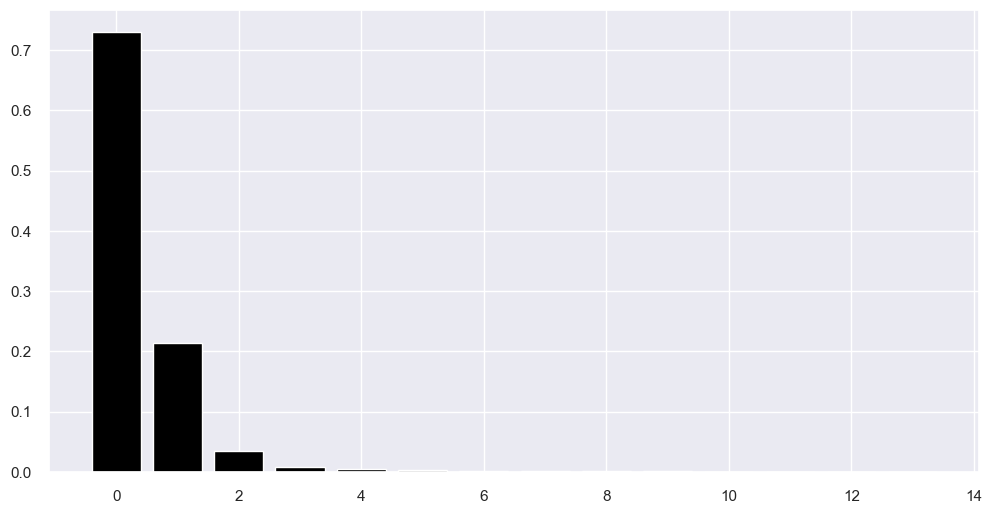

In [52]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca component
df_pca = pd.DataFrame(principal_components)

Como estamos procurando varáveis com muita variação, optei por reduzir o espaço para as 2 variáveis que tem a maior variância segundo o PCA para ver se forma alguns clusters

<Axes: xlabel='0', ylabel='1'>

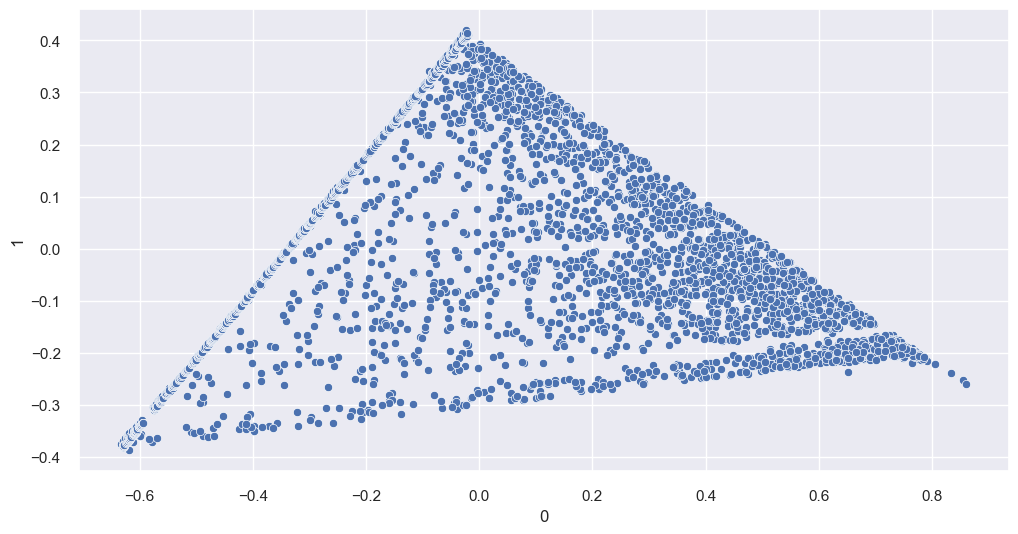

In [53]:
sns.scatterplot(x=0, y=1, data=df_pca)

PCA não deu muito certo, mostrando um espaço ainda bagunçado

## 4.3.2 U-MAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

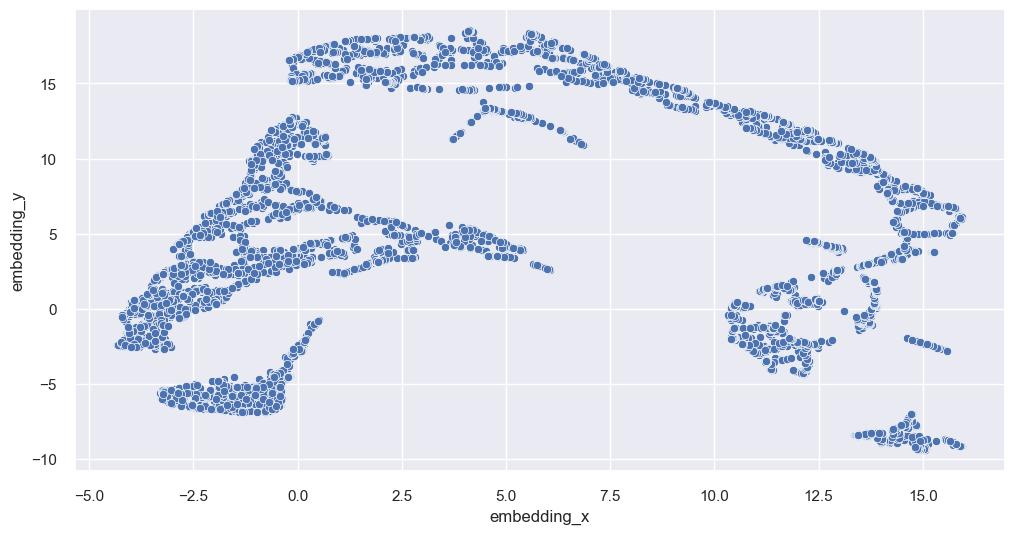

In [54]:
reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(X)

#embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:,0]
df_umap['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_umap)

UMAP deu um espaço pouca coisa melhor que o PCA mas ainda sim bem aleatório

## 4.3.3 t-SNE

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

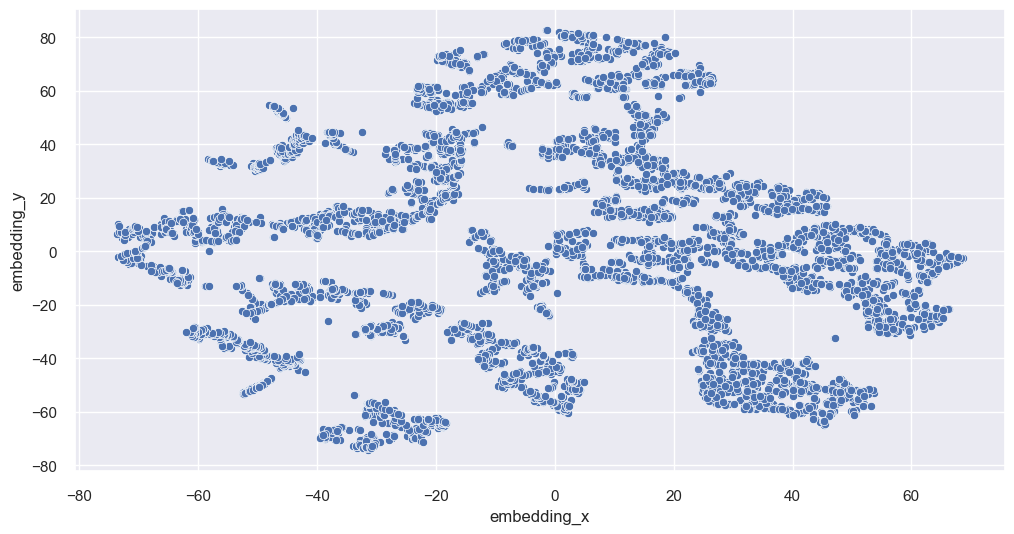

In [55]:
reducer = TSNE(n_components=2, random_state=42, n_jobs=-1)
embedding = reducer.fit_transform(X)

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:,0]
df_tsne['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_tsne)

Assim como o UMAP, não conseguiu organizar os dados

## 4.3.4 Tree-Based Embedding

In [56]:
X = df43.drop('monetary', axis=1).copy()
y = df43['monetary'].copy()

In [57]:
#model definition
rf = en.RandomForestRegressor(random_state=42, n_estimators=100, criterion='squared_error')

rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [58]:
#create leafs
df_leafs = pd.DataFrame(rf.apply(X))

In [59]:
df_leafs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,6419,6261,6422,6699,6512,6453,6434,6479,6260,6536,6372,6288,6376,6343,6381,6452,6338,6364,6314,6497,6392,6440,6403,6387,6304,6361,6443,6488,6277,6308,6145,6296,6508,6427,6342,6472,6488,6449,6319,6448,6516,6325,6293,6430,6285,6308,6552,6369,6449,6298,6685,6398,6408,6417,6433,6306,6371,6445,6021,6365,6531,6358,6367,6442,5280,6334,6416,6273,6479,6106,6397,6385,6445,6330,6278,6247,6355,6332,6426,6436,6413,6376,6639,6520,6606,6284,6409,6203,6112,6387,6535,6409,6431,6507,6326,6203,6593,6326,6407,6491
1,4314,4317,4215,4228,4124,4583,4304,4318,4587,4473,4145,4032,4102,4173,4231,4125,4233,4125,4137,4234,4362,4357,4148,4361,4075,4133,4119,4303,4092,4181,4021,4296,4102,4359,4255,3951,4283,4196,4187,4127,4259,4142,4204,4342,5635,4229,4286,4113,4213,4305,4403,4257,4498,4110,4258,4179,4116,4209,4168,4168,4106,4059,4195,4439,4644,4305,4246,4075,4329,4377,4257,4263,4235,4232,4196,4153,4211,4092,3794,4379,4224,4129,4252,4412,3837,3866,4047,4064,3747,4112,4197,4371,4222,4227,4161,4125,4046,4218,4294,4493
2,4564,5285,5371,5239,4406,3610,5347,4526,4933,4719,5268,5218,5379,4392,4466,4428,4413,5292,4398,5293,4583,4525,5370,4602,5285,5264,5337,4473,4368,5353,5280,5449,5337,5305,4523,5288,5368,5440,4369,5328,4401,4352,5231,3544,4611,4432,5387,5305,4449,4605,5382,4472,4725,5234,4530,5206,5250,5331,5291,5292,5355,5140,4477,4802,5698,4510,4470,5148,4650,5404,5265,5287,5274,5205,5383,4432,5268,5238,5298,4640,4484,4454,4501,3561,4952,5148,5235,5265,4488,5290,5347,4543,4476,5273,5252,5228,5190,5427,5696,4957
3,2226,2107,2067,2446,2142,2110,2187,2179,2267,2197,2144,2120,2023,2070,2081,2103,1763,2122,2049,2183,2160,2280,2146,2120,1673,2180,2118,2084,2045,2094,1700,2064,2122,2199,1804,1782,2246,2131,2120,2108,2286,2090,2183,1838,2306,2121,2213,1729,2038,2085,2159,2070,2331,2119,2042,2135,1638,1854,1676,2146,2031,2094,2058,2096,2360,1788,1819,1721,2059,1728,1787,2087,1857,2161,1833,2031,2088,2058,2305,2180,2169,2056,2204,1861,1937,1677,2092,1710,1972,2085,2015,2198,2114,1902,1852,2116,2323,2216,2106,2166
4,6035,5911,6038,6244,6038,4227,5990,5993,4282,4037,5960,5933,6040,5996,5961,6080,5920,6021,5920,5950,4048,6116,5946,6039,5926,5957,5987,6007,5890,6007,5755,4952,5988,5953,3953,6005,6054,6049,5894,6026,6055,5854,5959,4044,5430,5947,6055,5944,5013,3914,6236,6004,4423,5941,6052,5871,6024,6049,4803,5937,6133,5789,5982,4014,4419,4023,6037,5848,3954,4893,5950,5999,5988,5949,4844,4991,5964,5972,6018,4155,6071,3851,6148,4019,5951,5855,6060,5968,3437,6021,6183,4062,6025,5969,5903,5846,6194,4846,5023,4221


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

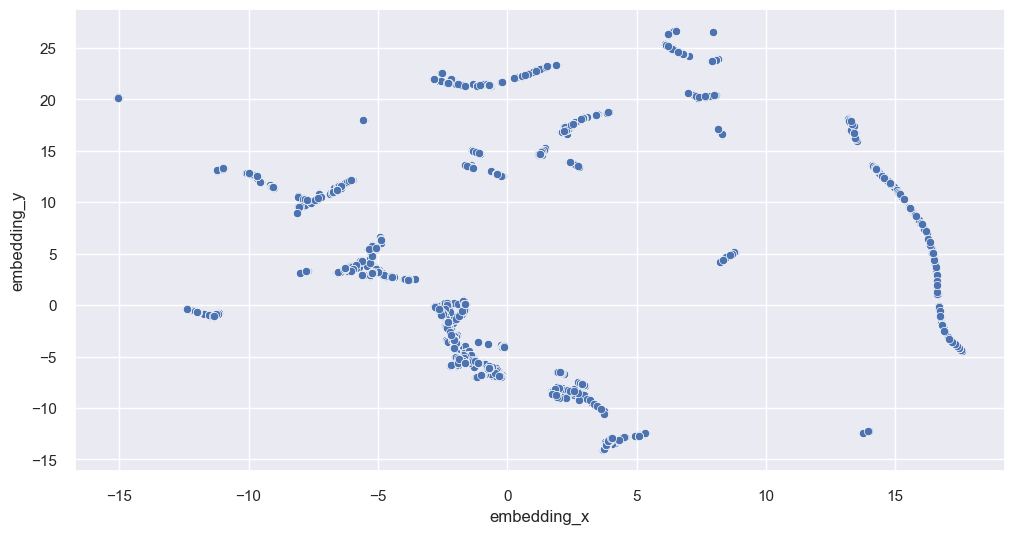

In [60]:
reducer = umap.UMAP(random_state=42, n_neighbors=120, min_dist=0.015)
embedding = reducer.fit_transform(df_leafs)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_tree)

A redução de dimensionalidade pela RandomForest deu um resultado muito melhor, podendo ser observados vários clusters espaçados na imagem acima.

# 5.0 DATA PREPARATION

Padronização (Standardization) -> Premissa de que os dados vieram de uma dist. normal
Rescala (Rescaling) -> Sem premissa

**Notes**

1. Distribuição Normal e não possui Outlier -> Standard Scaler
2. Distruibuição Normal e Possui Outlier -> Robust Scaler - Quartis
3. Não Distruição Normal -> MinMaxScaler

**Testes de Normalidade**
1. QQ Plot - Quantile Plot(Quatile teorica x Quantile real)
2. KS Teste - Kolgomorov Smirnoff

**Detecção de Outliers**
1. Box Plot -> Pontos são identificados como Outliers
2. IRQ * 2.5 -> acima desse valor(Outlier)

Z-Score
1. -3 > z_Score > 3 -> Outliers

Normalização -> (Dinheiro - Media(dinheiro))/desvio_padrao(dinheiro) = Dinheiro/Dinheiro -> Adimensional Faz sentido calcular distâncias

Rescala -> (Dinheiro - Min(Dinheiro) / Max (dinheiro) - Min(dinheiro)) = Dinheiro / Dinheiro = Adimensional Faz sentido usar distâncias

In [61]:
#testar emcima do embedding tree
df5 = df_tree.copy()
#df5 = df4.copy()

In [62]:
# mms = pp.MinMaxScaler()
# ss = pp.StandardScaler()

# #Transform
# transf_list = df5.drop('customer_id', axis=1).columns

# for i in transf_list:
#     df5[i] = mms.fit_transform(df5[i].values.reshape(-1,1))    

Após olhar as variáveis, nenhuma apresentou algo perto de uma distruibuição normal, então optamos por utilizar MinMax em todas

# 6.0 FEATURE SELECTION

Optei por remover algumas variáveis. Inicialmente vou tirar todas as variáveis que representam uma média, porque no fim do projeto já irei entregar as médias para o CEO

Olhando o pairplot na seção 4.2, podemos observar algumas variáveis que representam a mesma coisa, ex: qtd_items, qtd_invoices, qtd_prods

In [63]:
# cols_selected = ['customer_id','monetary', 'qtd_prods', 'recency', 'frequency', 'qtd_returns']

In [64]:
#df6 = df5.loc[:,cols_selected].copy()
df6 = df_tree.copy()

# 7.0 HYPERPARAMETER FINE TUNNING(Find Clusters)

In [65]:
#X = df6.drop('customer_id', axis=1)
X = df_tree.copy()

In [66]:
X.head()

,embedding_x,embedding_y
0,2.990943,-8.715363
1,-5.370432,3.834109
2,-2.499022,-0.813920
3,7.356696,20.135714
4,-0.823452,-5.800018


In [67]:
clusters = np.arange(2,16,1)

## 7.1 K-Means

In [68]:
# kmeans_list = []
# for k in clusters:
#     #model
#     kmeans_model = c.KMeans(n_clusters=k, n_init=50, random_state=0)

#     #training
#     kmeans_model.fit(X)

#     #predict
#     labels = kmeans_model.predict(X)

#     #performance
#     sil = mt.silhouette_score(X, labels, metric='euclidean')
#     kmeans_list.append(sil)

Usando o embedding da árvore de decisão conseguimos valores de silhueta maiores e com mais clusters.

KeyboardInterrupt: 

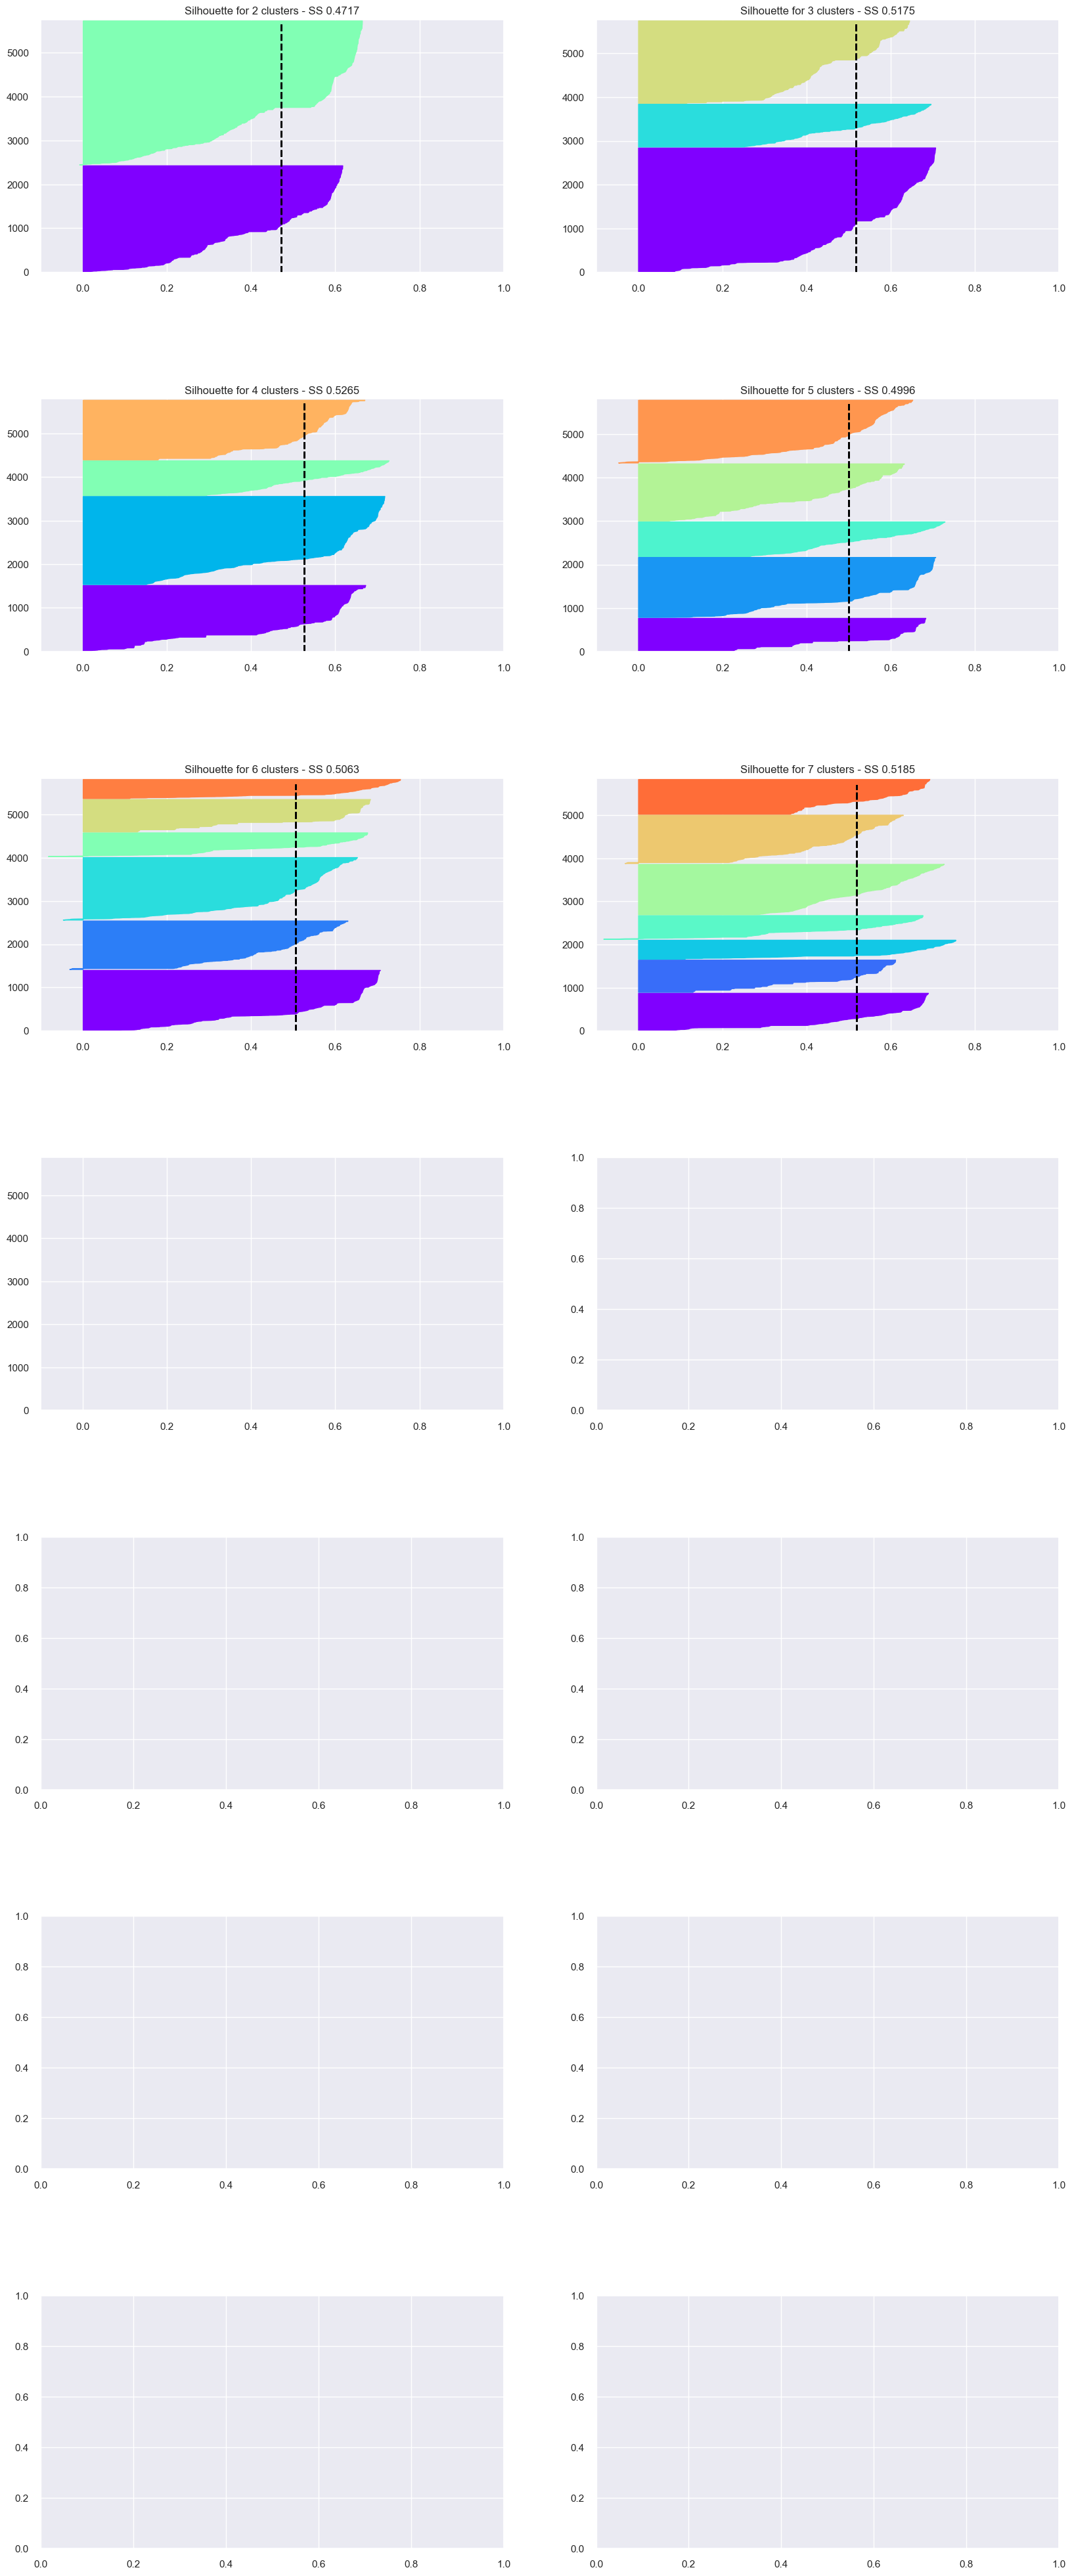

In [69]:
cluster_list = np.arange(2, 16, 1)
data = X.copy()
labels_at_k, sil_scores_at_k = [], []
silhouette_plots = []

fig, ax = plt.subplots(int(np.ceil(len(cluster_list) / 2)), 2, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5)

min_x_tick = 0

for cluster in cluster_list:
    q, mod = divmod(cluster, 2)

    # Set the x-axis and y-axis limits for each subplot
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(data) + (cluster + 1) * 20])

    # Perform KMeans clustering with the specified number of clusters
    model = c.KMeans(init='k-means++', random_state=0, n_clusters=cluster, n_init=50)
    model.fit(data)
    labels = model.labels_
    labels_at_k.append(cluster)
    ss_score = mt.silhouette_score(data, labels=labels, metric='euclidean')
    sil_scores_at_k.append(ss_score)
    samples_silhouette_values = mt.silhouette_samples(data, labels)

    y_lower = 20

    for i in range(cluster):
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        ith_samples_silhouette_values.sort()
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.get_cmap('rainbow')
        color = cmap(i / cluster)

        # Plot the silhouette values for each cluster
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values, color=color, alpha=1)
        ax[q-1, mod].vlines(ss_score, -10, data.shape[0], linestyle='--', color='black', linewidth=2, label="Avg Sil Score" if i == 0 else "")
        ax[q-1, mod].set_title(f'Silhouette for {cluster} clusters - SS {ss_score:.4f}')
        ax[q-1, mod].set_ylim([-10, len(data) + (cluster + 1) * 20])
      
        x_tick = np.round(min(samples_silhouette_values), 1)

        y_lower = y_upper + 20

    if x_tick < min_x_tick:
        min_x_tick = x_tick

    # Store the silhouette plot for later use
    silhouette_plots.append(ax[q-1, mod])

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cluster_list, sil_scores_at_k, 'k--', marker='o')
ax.vlines(cluster_list[np.argmax(sil_scores_at_k)], sil_scores_at_k[np.argmin(sil_scores_at_k)],
          sil_scores_at_k[np.argmax(sil_scores_at_k)], linestyle='--', color='orange', label='Max Silhouette')

ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Clusters (K)')
ax.set_title(f'Silhouette Scores for {type(model).__name__}')
ax.legend()

# Plot the silhouette plots with adjusted ticks and labels
for silhouette_plot in silhouette_plots:
    plt.sca(silhouette_plot)
    plt.yticks(np.arange(0, len(data), int(len(data)/5)))

    plt.xlim([min_x_tick, 1])
    plt.xticks(np.arange(x_tick, 1.05, 0.1))

plt.show()

## 7.2 GMM

In [ ]:
# gmm_list = []
# for k in clusters:
#     #model definition
#     model_gmm = GaussianMixture(n_components=k, n_init=25) #numero de gaussianas

#     #model training
#     model_gmm.fit(X)

#     #model predict
#     labels = model_gmm.predict(X)

#     #model performance
#     sil = mt.silhouette_score(X, labels, metric='euclidean')
#     gmm_list.append(sil)

In [ ]:
# plt.plot(clusters, gmm_list, linestyle='--', color='b', marker='o')
# plt.xlabel('K')
# plt.ylabel('Silhouette Score')
# plt.title('K x Silhouette Score')

In [ ]:
cluster_list = np.arange(2, 16, 1)
data = X.copy()
labels_at_k, sil_scores_at_k = [], []
silhouette_plots = []

fig, ax = plt.subplots(int(np.ceil(len(cluster_list) / 2)), 2, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5)

min_x_tick = 0

for cluster in cluster_list:
    q, mod = divmod(cluster, 2)

    # Set the x-axis and y-axis limits for each subplot
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(data) + (cluster + 1) * 20])

    # Perform KMeans clustering with the specified number of clusters
    model = GaussianMixture(n_components=k, n_init=25)
    model.fit(data)
    labels = model.predict(data)
    labels_at_k.append(cluster)
    ss_score = mt.silhouette_score(data, labels=labels, metric='euclidean')
    sil_scores_at_k.append(ss_score)
    samples_silhouette_values = mt.silhouette_samples(data, labels)

    y_lower = 20

    for i in range(cluster):
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        ith_samples_silhouette_values.sort()
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.get_cmap('rainbow')
        color = cmap(i / cluster)

        # Plot the silhouette values for each cluster
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values, color=color, alpha=1)
        ax[q-1, mod].vlines(ss_score, -10, data.shape[0], linestyle='--', color='black', linewidth=2, label="Avg Sil Score" if i == 0 else "")
        ax[q-1, mod].set_title(f'Silhouette for {cluster} clusters - SS {ss_score:.4f}')
        ax[q-1, mod].set_ylim([-10, len(data) + (cluster + 1) * 20])
      
        x_tick = np.round(min(samples_silhouette_values), 1)

        y_lower = y_upper + 20

    if x_tick < min_x_tick:
        min_x_tick = x_tick

    # Store the silhouette plot for later use
    silhouette_plots.append(ax[q-1, mod])

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cluster_list, sil_scores_at_k, 'k--', marker='o')
ax.vlines(cluster_list[np.argmax(sil_scores_at_k)], sil_scores_at_k[np.argmin(sil_scores_at_k)],
          sil_scores_at_k[np.argmax(sil_scores_at_k)], linestyle='--', color='orange', label='Max Silhouette')

ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Clusters (K)')
ax.set_title(f'Silhouette Scores for {type(model).__name__}')
ax.legend()

# Plot the silhouette plots with adjusted ticks and labels
for silhouette_plot in silhouette_plots:
    plt.sca(silhouette_plot)
    plt.yticks(np.arange(0, len(data), int(len(data)/5)))

    plt.xlim([min_x_tick, 1])
    plt.xticks(np.arange(x_tick, 1.05, 0.1))

plt.show()

## 7.3 Hierachical Clustering

In [ ]:
#model definition and training
hc_model = hc.linkage(X, 'ward')

In [ ]:
# hc.dendrogram(
#                 hc_model,
#                 leaf_rotation=90,
#                 leaf_font_size=9)

# plt.plot()

Cluster amarelo tende a ser mais bagunçado e esticado. O cluster rosa claro tende a ser mais redondo e uniforme

In [ ]:
hc.dendrogram(
                hc_model,
                truncate_mode='lastp',
                p=12,
                leaf_rotation=90,
                leaf_font_size=8,
                show_contracted=True)

plt.plot()

### 7.3.1 HClustering Silhouette Score

In [ ]:
# hc_list = []
# for k in clusters:
#     #model definition & training
#     hc_model = hc.linkage(X, 'ward')

#     #model predict
#     labels = hc.fcluster(hc_model, k, criterion='maxclust')

#     #metrics
#     sil = mt.silhouette_score(X, labels, metric='euclidean')
#     hc_list.append(sil)

In [ ]:
# plt.plot(clusters, hc_list, linestyle='--', marker='o')

In [ ]:
cluster_list = np.arange(2, 16, 1)
data = X.copy()
labels_at_k, sil_scores_at_k = [], []
silhouette_plots = []

fig, ax = plt.subplots(int(np.ceil(len(cluster_list) / 2)), 2, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5)

min_x_tick = 0

for cluster in cluster_list:
    q, mod = divmod(cluster, 2)

    # Set the x-axis and y-axis limits for each subplot
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(data) + (cluster + 1) * 20])

    # Perform KMeans clustering with the specified number of clusters
    model = hc.linkage(X, 'ward')
    labels = hc.fcluster( model, cluster, criterion='maxclust' )
    labels_at_k.append(cluster)
    ss_score = mt.silhouette_score(data, labels=labels, metric='euclidean')
    sil_scores_at_k.append(ss_score)
    samples_silhouette_values = mt.silhouette_samples(data, labels)

    y_lower = 20

    for i in range(cluster):
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        ith_samples_silhouette_values.sort()
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.get_cmap('rainbow')
        color = cmap(i / cluster)

        # Plot the silhouette values for each cluster
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values, color=color, alpha=1)
        ax[q-1, mod].vlines(ss_score, -10, data.shape[0], linestyle='--', color='black', linewidth=2, label="Avg Sil Score" if i == 0 else "")
        ax[q-1, mod].set_title(f'Silhouette for {cluster} clusters - SS {ss_score:.4f}')
        ax[q-1, mod].set_ylim([-10, len(data) + (cluster + 1) * 20])
      
        x_tick = np.round(min(samples_silhouette_values), 1)

        y_lower = y_upper + 20

    if x_tick < min_x_tick:
        min_x_tick = x_tick

    # Store the silhouette plot for later use
    silhouette_plots.append(ax[q-1, mod])

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cluster_list, sil_scores_at_k, 'k--', marker='o')
ax.vlines(cluster_list[np.argmax(sil_scores_at_k)], sil_scores_at_k[np.argmin(sil_scores_at_k)],
          sil_scores_at_k[np.argmax(sil_scores_at_k)], linestyle='--', color='orange', label='Max Silhouette')

ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Clusters (K)')
ax.set_title(f'Silhouette Scores for {type(model).__name__}')
ax.legend()

# Plot the silhouette plots with adjusted ticks and labels
for silhouette_plot in silhouette_plots:
    plt.sca(silhouette_plot)
    plt.yticks(np.arange(0, len(data), int(len(data)/5)))

    plt.xlim([min_x_tick, 1])
    plt.xticks(np.arange(x_tick, 1.05, 0.1))

plt.show()

## 7.4 DBSCAN

In [ ]:
eps = 2 #tamanho do raio da gaussiana
min_samples = 20 #qtd minima de pontos dentro do raio para considerar como vizinhança

#model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

#model training & predict
labels = dbscan_model.fit_predict(X)

#silhouette
sil = mt.silhouette_score(X, labels, metric='euclidean')

print(f'Sillhouette Score: {sil}')
print(f'Number of Clusters: {len(np.unique(labels))}')



In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X) #pega o qtd de pontos considerado na gaussiana e 
                                                             #calcular a média das disntacias dos 20 
                                                             #mais proximos para todos os outros pontos
distances, indices = neighbors.kneighbors(X)                

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] #a primeira coluna já possui a distancia de todos os pontos
plt.plot(distances)

Onde o cotovelo forma, é onde as distâncias dos pontos em relação aos vizinhos mais próximos começa a ficar muito grande. Quando o cotovelo começa a formar geralmente é o número que devo usar no raio da Gaussina no DBSCAN, no caso algo perto de 0.2

In [ ]:
dbscan_list = [0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,]

## 7.5 Results

In [ ]:
df_results = pd.DataFrame({
            'KMeans': kmeans_list,
            'GMM': gmm_list,
            'HCluster': hc_list
            #'DBSCAN': dbscan_list}
}).T
df_results.columns = clusters

In [ ]:
df_results.style.highlight_max(color='lightgreen', axis=1)

Podemos ver que com o embedding da árvore ele consegue subdividir muito melhor os dados. Porém usar 17 grupos é uma quantidade alta. Utilizarei 11 por enquanto pois já tem uma silhueta alta.

# 8.0 MODEL TRAINING

## 8.1 K-Means

In [ ]:
k = 5
#definition
kmeans = c.KMeans(n_clusters=k, init='k-means++', n_init=100, max_iter=300, random_state=42)

#training
kmeans.fit(X)

#clusters
labels_kmeans = kmeans.labels_

In [ ]:
df9 = X.copy()
df9['clusters'] = labels_kmeans
sns.scatterplot(data=df9, x="embedding_x", y="embedding_y", hue="clusters", palette="deep")

In [ ]:
print(f'SS Score: {mt.silhouette_score(X, labels_kmeans):.3f}')

## 8.2 GMM

In [ ]:
k = 6
#model definition
model_gmm = GaussianMixture(n_components=k, n_init=20) #numero de gaussianas

#model training
model_gmm.fit(X)

#model predict
labels_gmm = model_gmm.predict(X)

In [ ]:
df9 = X.copy()
df9['clusters'] = labels_gmm
sns.scatterplot(data=df9, x="embedding_x", y="embedding_y", hue="clusters", palette="deep")

In [ ]:
print(f'SS Score: {mt.silhouette_score(X, labels_gmm):.3f}')

## 8.3 HCluster - FAVORITO

In [70]:
k=5
#model definition & training
hc_model = hc.linkage(X, 'ward')

#model predict
labels_hc = hc.fcluster(hc_model, k, criterion='maxclust')

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

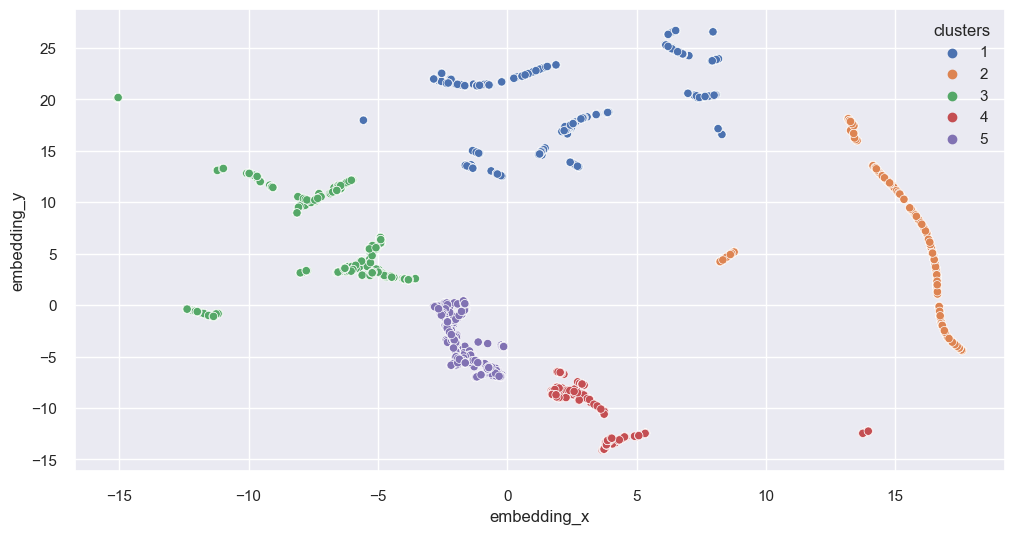

In [71]:
df9 = X.copy()
df9['clusters'] = labels_hc
sns.scatterplot(data=df9, x="embedding_x", y="embedding_y", hue="clusters", palette="deep")

In [72]:
print(f'SS Score: {mt.silhouette_score(X, labels_hc):.3f}')

SS Score: 0.504


## 8.4 DSCAN

In [ ]:
# eps = 3 #tamanho do raio da gaussiana
# min_samples = 30 #qtd minima de pontos dentro do raio para considerar como vizinhança

# #model definition
# dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# #model training & predict
# labels = dbscan_model.fit_predict(X)

In [ ]:
# #WSS
# print(f'WSS Score: {kmeans.inertia_:.3f}')

# print(f'SS Score: {mt.silhouette_score(X, labels):.3f}')

## 9.5 Cluster Profile

In [73]:
df95 = df4.copy()
df95['clusters'] = labels_hc

In [74]:
df95.head()

,customer_id,monetary,unique_prods,qt_prods,avg_basket_size,recency,relationship_duration,purchase_count,returns_count,monetary_returns,avg_unit_price,return_rate,avg_purchase_interval,frequency,avg_order_value,clusters
0,12347.0,4310.00,103,182,26.00,2,365,7,0.0,0.00,2.644011,0.0,0.019178,0.019178,615.714286,4
1,12348.0,1437.24,21,27,6.75,75,283,4,0.0,0.00,0.692963,0.0,0.014134,0.014134,359.310000,3
2,12349.0,1457.55,72,72,72.00,18,0,1,0.0,0.00,4.237500,0.0,0.000000,0.000000,1457.550000,5
3,12350.0,294.40,16,16,16.00,310,0,1,0.0,0.00,1.581250,0.0,0.000000,0.000000,294.400000,1
4,12352.0,1385.74,57,77,11.00,36,260,7,63.0,-120.33,4.075455,9.0,0.026923,0.026923,197.962857,5


**Lembrete**: NÃO podemos explicar porque o customer 1 e 2 estão no mesmo clusters com esses dados, porque eles foram classificados em um espaço de embedding criado pelo algoritmo em alta dimensão. Se for especificamente você precisar explicar o porquê o os customers se parecem será necessário encontrar os clusters no espaço original ao invés do embedding.

In [75]:
#Per Monetary
df_monetary = df95.loc[:,['clusters','monetary']].groupby('clusters').mean().reset_index()

#Per Frequency
df_frequency = df95.loc[:,['clusters','frequency']].groupby('clusters').mean().reset_index()

#Per Recency
df_recency = df95.loc[:,['clusters','recency']].groupby('clusters').mean().reset_index()

#Per Pencentual
df_client_perc = df95.loc[:,['customer_id','clusters']].groupby('clusters').count().reset_index()
df_client_perc['customer_id'] = df_client_perc['customer_id'].apply(lambda x: 100*(x)/(df_client_perc['customer_id'].sum()))
df_client_perc = df_client_perc.rename(columns={'customer_id':'percent'})

#Per qtd_products
df_prods = df95.loc[:,['clusters','qt_prods']].groupby('clusters').mean().reset_index()

#Per Returns
df_returns = df95.loc[:,['clusters','returns_count']].groupby('clusters').mean().reset_index()

#Per Relationship days
df_duration = df95.loc[:,['clusters','relationship_duration']].groupby('clusters').mean().reset_index()

#Per Customer
df_customer = df95.loc[:,['clusters','customer_id']].groupby('clusters').count().reset_index()

df_resume = (pd.merge(df_monetary, df_frequency, on='clusters', how='left')
             .merge(df_recency, on='clusters', how='left')
             .merge(df_client_perc, on='clusters', how='left')
             .merge(df_prods, on='clusters', how='left')
             .merge(df_returns, on='clusters', how='left')
             .merge(df_duration, on='clusters', how='left')
             .merge(df_customer, on='clusters', how='left')
             )


In [76]:
df_resume

,clusters,monetary,frequency,recency,percent,qt_prods,returns_count,relationship_duration,customer_id
0,1,280.102519,0.016227,149.095310,23.217422,22.301059,2.193646,32.131619,1322
1,2,93.049877,0.006202,187.118488,17.193537,9.247191,0.880490,0.391216,979
2,3,1053.963650,0.029953,94.205109,24.060414,38.831387,11.224088,123.827007,1370
3,4,6599.350958,0.086662,44.127336,15.033368,300.517523,50.135514,246.336449,856
4,5,2119.202031,0.024631,101.500428,20.495258,152.898886,35.820908,122.052271,1167


## Cluster 4 (Insiders)

- Número de customers = 856
- Recência Média = 44 dias
- Faturamento Médio = R$6599.35
- Média de Produtos Comprados = 300 produtos
- Frequência de Produtos Comprados = 0.0866 produtos comprados/dia

# 10.0 EXPLORATORY DATA ANALYSIS(EDA) 

In [98]:
df10 = df95.copy()

In [99]:
df10.head()

,customer_id,monetary,unique_prods,qt_prods,avg_basket_size,recency,relationship_duration,purchase_count,returns_count,monetary_returns,avg_unit_price,return_rate,avg_purchase_interval,frequency,avg_order_value,clusters
0,12347.0,4310.00,103,182,26.00,2,365,7,0.0,0.00,2.644011,0.0,0.019178,0.019178,615.714286,4
1,12348.0,1437.24,21,27,6.75,75,283,4,0.0,0.00,0.692963,0.0,0.014134,0.014134,359.310000,3
2,12349.0,1457.55,72,72,72.00,18,0,1,0.0,0.00,4.237500,0.0,0.000000,0.000000,1457.550000,5
3,12350.0,294.40,16,16,16.00,310,0,1,0.0,0.00,1.581250,0.0,0.000000,0.000000,294.400000,1
4,12352.0,1385.74,57,77,11.00,36,260,7,63.0,-120.33,4.075455,9.0,0.026923,0.026923,197.962857,5


## 10.1 Hipóteses

1. O cluster insider gera em 50% da receita da minha base de dados total.
2. O cluster insider compra 5x mais frequente que o total de clientes.
3. O cluster insider demora em média metade do tempo para comprar novamento que o segundo cluster.
4. O cluster Insider tem o maior percentual de clientes entre todos os clussters.
5. O Cluster Insiders compra 4x mais produtos que o 2º cluster que compra mais.
6. O cluster Insider é o cluster que menos retorna produtos.

### H1 - O cluster insider gera 50% da receita da minha base de dados total.

In [100]:
receita_insiders = df10.loc[df10['clusters'] == 4,'monetary'].sum()
receita_total = df10['monetary'].sum()
print(f"Receita Insiders: {receita_insiders/receita_total:.2f}%")

Receita Insiders: 0.56%


VERDADEIRO

### H2 - O cluster insider compra 5x mais frequente que o total de clientes.

In [101]:
freq_insiders = df10.loc[df10['clusters'] == 4,'frequency'].mean()
freq_total = df10['frequency'].mean()
print(f"A frequência dos Insiders é em média: {freq_insiders:.2f}")
print(f"A frequência da base total é em média: {freq_total:.2f}")

A frequência dos Insiders é em média: 0.09
A frequência da base total é em média: 0.03


FALSO.  A frequência dos Insiders é 3x maior que média geral

### H3 - O cluster insider demora em média metade do tempo para comprar novamento que o segundo cluster.

In [102]:
recency_insiders = df10.loc[df10['clusters'] == 4,'recency'].mean()
recency_total = df10['recency'].mean()
print(f"Os insiders compram em média {recency_total/recency_insiders:.2f} vezes mais rápido que a base de dados")

Os insiders compram em média 2.65 vezes mais rápido que a base de dados


VERDAEDEIRO. Os enquanto a base compra em média a cada 100 dias, os insiders compram em média a cada 44 dias.

### H4 - O cluster Insider tem o maior percentual de clientes entre todos os clusters.

In [103]:
df_resume.sort_values(by='percent')

,clusters,monetary,frequency,recency,percent,qt_prods,returns_count,relationship_duration,customer_id
3,4,6599.350958,0.086662,44.127336,15.033368,300.517523,50.135514,246.336449,856
1,2,93.049877,0.006202,187.118488,17.193537,9.247191,0.880490,0.391216,979
4,5,2119.202031,0.024631,101.500428,20.495258,152.898886,35.820908,122.052271,1167
0,1,280.102519,0.016227,149.095310,23.217422,22.301059,2.193646,32.131619,1322
2,3,1053.963650,0.029953,94.205109,24.060414,38.831387,11.224088,123.827007,1370


FALSO. Os Insiders correspondem apenas à 15% da base

### H5 - O Cluster Insiders compra mais de 50% de todos os produtos em relação à base total

In [105]:
qtd_insiders = df10.loc[df10['clusters'] == 4,'qt_prods'].sum()
qtd_total = df10['qt_prods'].sum()
print(f"A quantidade de produtos dos insiders é {qtd_insiders/qtd_total:.2f}% da base")

A quantidade de produtos dos insiders é 0.49% da base


Verdadeiro. Os insiders correspondem à 49% da quantidade total de produtos

### H6 - O cluster Insider é o cluster que menos retorna produtos.

In [106]:
returns_insiders = df10.loc[df10['clusters'] == 4,'returns_count'].sum()
returns_total = df10['returns_count'].sum()
print(f"A quantidade de devoluções dos insiders é {returns_insiders/returns_total:.2f}% da base")

A quantidade de devoluções dos insiders é 0.41% da base


FALSO. O Insiders é o que mais devolve produtos. Talvez possa ser uma coisa boa pois quanto mais eles tem a liberdade de devolver mais eles podem comprar com segurança 

## 10.2 Perguntas de Negócio

### 1. Quem são as pessoas elegíveis para participar do programa Insiders?

In [107]:
df10.loc[df10['clusters'] == 4,['customer_id']] 

,customer_id
0,12347.0
9,12357.0
14,12362.0
25,12378.0
32,12388.0
...,...
5685,22696.0
5686,22699.0
5690,22706.0
5691,22707.0


### 2. Quantos clientes serão incluídos no grupo?

In [108]:
df10.loc[df10['clusters'] == 4,['customer_id']].shape[0] 

856

### 3. Quais são as características-chave desses clientes?

1. O cluster insider gera em 50% da receita da minha base de dados total.
2. O cluster insider compra 3x mais frequente que o total de clientes.
3. O cluster insider demora em média metade do tempo para comprar novamento que o segundo cluster.
4. O Cluster Insiders compra 50% de todos os produtos vendidos
5. O cluster Insider é o cluster que mais retorna produtos.

### 4. Qual é a porcentagem de contribuição de receita dos Insiders?

In [109]:
receita_insiders = df10.loc[df10['clusters'] == 4,'monetary'].sum()
receita_total = df10['monetary'].sum()
print(f"Receita Insiders: {receita_insiders/receita_total:.2f}%")

Receita Insiders: 0.56%


# 11.0 DEPLOY TO PRODUCTION

In [91]:
cols_selected = ['customer_id', 'monetary', 'recency', 'qt_prods', 'frequency', 'returns_count', 'relationship_duration', 'clusters']
df_deploy = df10[cols_selected].copy()
#change types
df_deploy['customer_id'] = df_deploy['customer_id'].astype(int)
df_deploy['returns_count'] = df_deploy['returns_count'].astype(int)
df_deploy['clusters'] = df_deploy['clusters'].astype(int)
df_deploy['relationship_duration'] = df_deploy['relationship_duration'].astype(int)
df_deploy['qt_prods'] = df_deploy['qt_prods'].astype(int)
df_deploy['recency'] = df_deploy['recency'].astype(int)




#save last training
df_deploy['last_training'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [92]:
df_deploy.head()

,customer_id,monetary,recency,qt_prods,frequency,returns_count,relationship_duration,clusters,last_training
0,12347,4310.00,2,182,0.019178,0,365,4,2023-06-26 13:59:32
1,12348,1437.24,75,27,0.014134,0,283,3,2023-06-26 13:59:32
2,12349,1457.55,18,72,0.000000,0,0,5,2023-06-26 13:59:32
3,12350,294.40,310,16,0.000000,0,0,1,2023-06-26 13:59:32
4,12352,1385.74,36,77,0.026923,63,260,5,2023-06-26 13:59:32


In [93]:
df_deploy.dtypes

customer_id                int32
monetary                 float64
recency                    int32
qt_prods                   int32
frequency                float64
returns_count              int32
relationship_duration      int32
clusters                   int32
last_training             object
dtype: object

In [78]:
import sqlite3
from sqlalchemy import create_engine, text

In [ ]:
# #create table
# query_create_table_insiders = """
#     CREATE TABLE insiders (
#         customer_id INTEGER,
#         monetary    REAL,
#         recency     INTEGER,
#         qtd_prods   INTEGER,
#         frequency   REAL,
#         qtd_returns INTEGER,
#         clusters    INTEGER   
#     )
#     """  
 
# conn = sqlite3.connect('insiders_db.sqlite') 
# conn.execute(query_create_table_insiders)
# conn.commit()
# conn.close()

# #insert data - append
# conn = create_engine('sqlite:///insiders_db.sqlite')
# df_deploy.to_sql('insiders', con=conn, if_exists='append', index=False)
# conn.close()

# #insert data - replace
# conn = create_engine('sqlite:///insiders_db.sqlite')
# df_deploy.to_sql('insiders', con=conn, if_exists='replace', index=False)
# conn.close()

# #select data

In [ ]:
# #create database
# conn = sqlite3.connect('insiders_db.sqlite') 
# conn.execute(query_create_table_insiders)
# conn.commit()
# conn.close()

In [94]:
#database coneection
conn = sqlite3.connect('insiders_db.sqlite')

#drop table
query_drop_insiders = """
    DROP TABLE insiders
"""

#create table
query_create_table_insiders = """
    CREATE TABLE insiders (
        customer_id           INTEGER,
        monetary              REAL,
        recency               INTEGER,
        qt_prods              INTEGER,
        frequency             REAL,
        returns_count         INTEGER,
        clusters              INTEGER,
        relationship_duration INTEGER,
        last_training         DATE
    )
    """
# conn.execute(query_drop_insiders)
# conn.commit()

# conn.execute(query_create_table_insiders)
# conn.commit()

In [95]:
# #insert data - append
# conn = create_engine('sqlite:///insiders_db.sqlite')
# df_deploy.to_sql('insiders', con=conn, if_exists='append', index=False)

5694

In [96]:
#consulting database
engine = create_engine('sqlite:///insiders_db.sqlite')
query = """
    SELECT * FROM insiders
"""

df = pd.read_sql_query(sql=text(query), con=engine.connect())

In [97]:
df

,customer_id,monetary,recency,qt_prods,frequency,returns_count,clusters,relationship_duration,last_training
0,12347,4310.00,2,182,0.019178,0,4,365,2023-06-26 13:59:32
1,12348,1437.24,75,27,0.014134,0,3,283,2023-06-26 13:59:32
2,12349,1457.55,18,72,0.000000,0,5,0,2023-06-26 13:59:32
3,12350,294.40,310,16,0.000000,0,1,0,2023-06-26 13:59:32
4,12352,1385.74,36,77,0.026923,63,5,260,2023-06-26 13:59:32
...,...,...,...,...,...,...,...,...,...
5689,22705,3.35,1,2,0.000000,0,2,0,2023-06-26 13:59:32
5690,22706,5699.00,1,634,0.000000,0,4,0,2023-06-26 13:59:32
5691,22707,6756.06,0,730,0.000000,0,4,0,2023-06-26 13:59:32
5692,22708,3217.20,0,59,0.000000,0,3,0,2023-06-26 13:59:32
